In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [2]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-150w", "caida0517-070w", "caida0517-030w"]
zipf2a = ["zipf2a-150w", "zipf2a-070w", "zipf2a-030w"]
zipf10 = ["zipf10-070w", "zipf10-030w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-150w_10_.pcap")
pcap_file.append("caida0517-070w_10_.pcap")
pcap_file.append("caida0517-030w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-070w_10_.pcap") 
pcap_file.append("zipf2a-030w_10_.pcap") 
pcap_file.append("zipf10-070w_10_.pcap") 
pcap_file.append("zipf10-030w_10_.pcap") 

### caida + zipf2a [10:25]
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + caida [25:40]
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf10 [40:50]
for a in caida0517:
    for b in zipf10:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + caida [50:60]
for a in zipf10:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + zipf10 [60:66]
for a in zipf2a:
    for b in zipf10:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + zipf2a [66:72]
for a in zipf10:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [72:92]
for a in caida0517:
    for b in caida0517:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + zipf2a [92:98]
for a in zipf2a:
    for b in zipf2a:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + zipf10 [98:100]
for a in zipf10:
    for b in zipf10:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
        
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-150w_10_.pcap', 'caida0517-070w_10_.pcap', 'caida0517-030w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-070w_10_.pcap', 'zipf2a-030w_10_.pcap', 'zipf10-070w_10_.pcap', 'zipf10-030w_10_.pcap', 'caida0517-500w_6_zipf2a-150w_4.pcap', 'caida0517-500w_6_zipf2a-070w_4.pcap', 'caida0517-500w_6_zipf2a-030w_4.pcap', 'caida0517-250w_6_zipf2a-150w_4.pcap', 'caida0517-250w_6_zipf2a-070w_4.pcap', 'caida0517-250w_6_zipf2a-030w_4.pcap', 'caida0517-150w_6_zipf2a-150w_4.pcap', 'caida0517-150w_6_zipf2a-070w_4.pcap', 'caida0517-150w_6_zipf2a-030w_4.pcap', 'caida0517-070w_6_zipf2a-150w_4.pcap', 'caida0517-070w_6_zipf2a-070w_4.pcap', 'caida0517-070w_6_zipf2a-030w_4.pcap', 'caida0517-030w_6_zipf2a-150w_4.pcap', 'caida0517-030w_6_zipf2a-070w_4.pcap', 'caida0517-030w_6_zipf2a-030w_4.pcap', 'zipf2a-150w_6_caida0517-500w_4.pcap', 'zipf2a-150w_6_caida0517-250w_4.pcap', 'zipf2a-150w_6_caida0517-150w_4.pcap', 'zipf2a-150w_6_caida0517-070w_4.pcap', 'zi

In [3]:
def prepare_testing_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200):
    
    profiler_fsd = {}
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [4]:
def prepare_testing_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200):
    
    profiler_fsd = {}
    
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [5]:
def prepare_profiler_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200):
    
    profiler_fsd = {}
    
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOfflineNew/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [6]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [7]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    
    return avg_fsd


In [13]:
def get_fsd_dict(dataset):
    fsd = {}
    with open(dataset, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            fsd[int(items[0])] = int(items[1])
    
    sorted_fsd = dict(sorted(list(fsd.items())))
    
    return sorted_fsd

In [8]:
def normalize_fsd(fsd):
    fn = sum(list(fsd.values()))
    
    return {key: (val/fn) for key,val in fsd.items()}

In [19]:
def plot_mrd_between_est_offline():
    # prepare profiler avg dirty fsd
    profiler_fsd = prepare_profiler_offline_fsd_data(datasets=pcap_file[:10], width=16384)
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # prepare testing avg fsd
    testing_fsd = prepare_testing_fsd_data(datasets=pcap_file[:10], width=16384)
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = get_avg_fsd(fsd_list[:10])
        
    MRDs = []
    # adjust dataset order
    labels = list(profiler_avg_fsd.keys())
    indexs = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'C1', 'C2']
    
    # ## cal by avg fsd
    # for testing_name, t_fsd in testing_avg_fsd.items():
    #     single_MRDs = []
    #     for profiler_name, p_fsd in profiler_avg_fsd.items():
    #         mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
    #         single_MRDs.append(mrd)
    #     MRDs.append(single_MRDs)
    
    # cal by avg mrd
    for testing_name, t_fsd in testing_fsd.items():
        single_MRDs = []
        for profiler_name, p_fsd in profiler_avg_fsd.items():
            total_mrd = 0.0
            for fsd in t_fsd[:10]:
                # mrd = calculate_mrd(p_fsd, fsd)
                mrd = calculate_mrd(normalize_fsd(p_fsd), normalize_fsd(fsd))
                total_mrd += mrd
            single_MRDs.append(round(total_mrd/len(t_fsd[:10]), 2))
        MRDs.append(single_MRDs)
    
    # Plot heatmap
    color = 'Blues'
    plt.figure(figsize=(10, 10))
    plt.imshow(MRDs, cmap=color , interpolation='nearest')

    # Add annotations for each cell
    for i in range(len(MRDs)):
        for j in range(len(MRDs[i])):
            plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black')

    plt.xticks(np.arange(len(labels)), indexs, rotation=0)
    plt.yticks(np.arange(len(labels)), indexs, rotation=0)
    

    plt.xlabel('Profilers', fontsize=16)
    plt.ylabel('Testing', fontsize=16)
    plt.title('MRD - EST & Offline', fontsize=20)
    plt.colorbar(shrink=0.6)  # Add colorbar
    for i, label in enumerate(labels):
        plt.text(len(labels)+3., i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        
    for i in range(len(MRDs)):
        min_value_index = np.argmin(MRDs[i])  # find idx with min val
        plt.gca().add_patch(plt.Rectangle((min_value_index-0.5, i-0.5), 1, 1, fill=False, edgecolor='Black', linewidth=2))
        
    plt.tight_layout()
    plt.show()   
        

In [21]:
def plot_mrd_between_est_gt():
    # prepare testing avg fsd
    testing_fsd = prepare_testing_fsd_data(datasets=pcap_file[:10])
    testing_avg_fsd = {}
    for name, fsd_list in testing_fsd.items():
        testing_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    # prepare testing gt avg fsd
    # testing_gt_fsd = prepare_testing_gt_fsd_data(datasets=pcap_file[:10])
    # testing_gt_avg_fsd = {}
    # for name, fsd_list in testing_gt_fsd.items():
    #     testing_gt_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
        
    # adjust dataset order
    labels = list(testing_fsd.keys())
    indexs = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'C1', 'C2']
    
    MRDs = []
    # ## cal by avg fsd
    # for testing_name, t_fsd in testing_avg_fsd.items():
    #     single_MRDs = []
    #     for profiler_name, p_fsd in testing_gt_avg_fsd.items():
    #         mrd = round(calculate_mrd(p_fsd, t_fsd), 2)
    #         single_MRDs.append(mrd)
    #     MRDs.append(single_MRDs)
    
    # cal by avg mrd
    for testing_name, t_fsd in testing_fsd.items():
        single_MRDs = []
        for name in pcap_file[:10]:
            GT_fsd = get_fsd_dict(pcap_folder+name[:-9]+'.txt')
            total_mrd = 0.0
            for fsd in t_fsd[:10]:
                # mrd = calculate_mrd(p_fsd, fsd)
                mrd = calculate_mrd(normalize_fsd(GT_fsd), normalize_fsd(fsd))
                total_mrd += mrd
            single_MRDs.append(round(total_mrd/len(t_fsd[:10]), 2))
        MRDs.append(single_MRDs)
    
    # Plot heatmap
    color = 'Oranges'
    plt.figure(figsize=(10, 10))
    plt.imshow(MRDs, cmap=color , interpolation='nearest')

    # Add annotations for each cell
    for i in range(len(MRDs)):
        for j in range(len(MRDs[i])):
            plt.text(j, i, f'{MRDs[i][j]:.2f}', ha='center', va='center', color='black')

    plt.xticks(np.arange(len(labels)), indexs, rotation=0)
    plt.yticks(np.arange(len(labels)), indexs, rotation=0)
    

    plt.xlabel('Profilers', fontsize=16)
    plt.ylabel('Testing', fontsize=16)
    plt.title('MRD - EST & GT', fontsize=20)
    plt.colorbar(shrink=0.6)  # Add colorbar
    for i, label in enumerate(labels):
        plt.text(len(labels)+3, i, f'{indexs[i]} = {label}', ha='center', va='center', rotation=0)
        
    for i in range(len(MRDs)):
        min_value_index = np.argmin(MRDs[i])  # find idx with min val
        plt.gca().add_patch(plt.Rectangle((min_value_index-0.5, i-0.5), 1, 1, fill=False, edgecolor='Black', linewidth=2))
    
    plt.tight_layout()
    plt.show()   
        

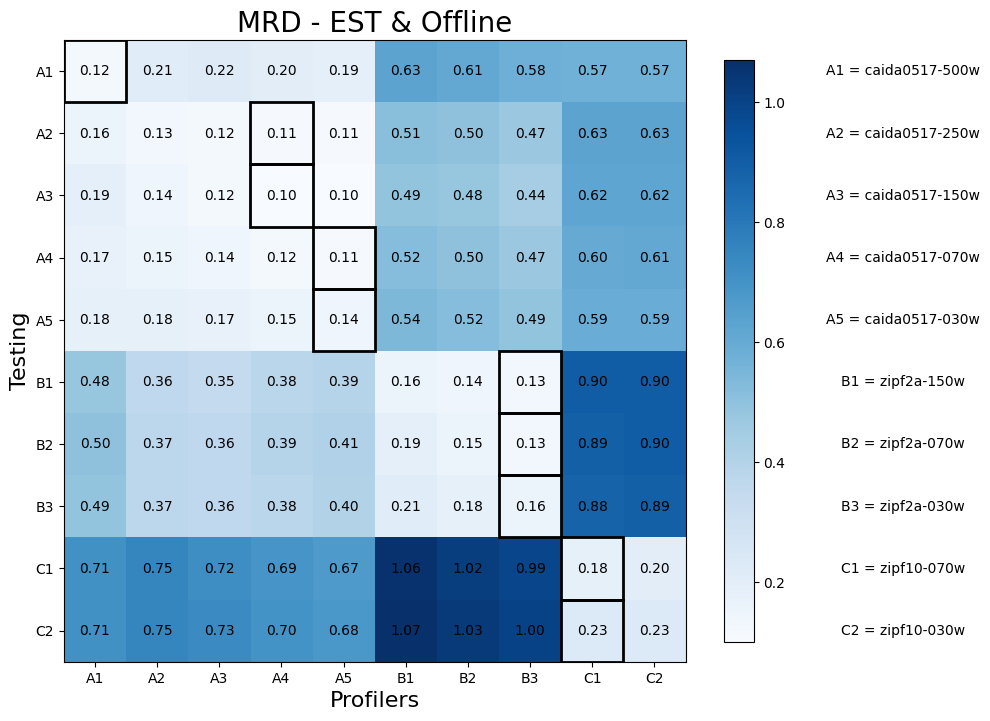

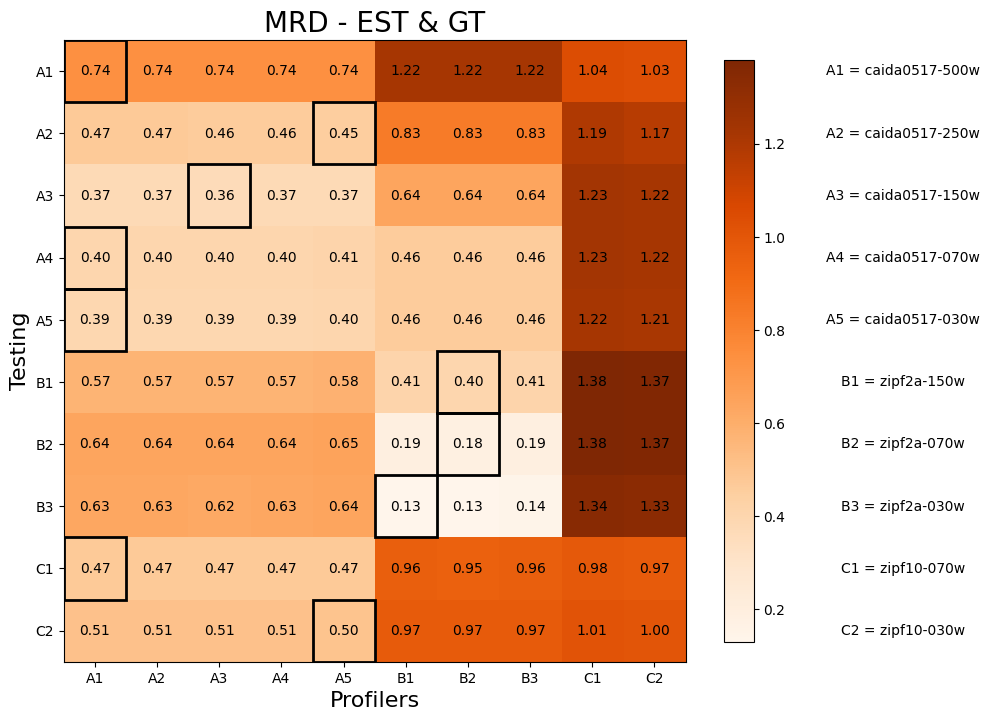

In [22]:
plot_mrd_between_est_offline()
plot_mrd_between_est_gt()